# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [4]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [7]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 0', tips[:5])
X

DesignMatrix with shape (5, 5)
  sex[Male]  sex[Female]  smoker[T.No]  time[T.Dinner]  net_bill
          0            1             1               1     15.98
          1            0             1               1      8.68
          1            0             1               1     17.51
          1            0             1               1     20.37
          0            1             1               1     20.98
  Terms:
    'sex' (columns 0:2)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [6]:
y

DesignMatrix with shape (5, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  Terms:
    'tip' (column 0)

In [10]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

model = smf.ols('tip ~ sex + smoker + time + net_bill', data=tips).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           2.64e-20
Time:                        12:00:13   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

In [11]:
model_final = smf.ols('tip ~ net_bill', data=tips).fit()
print(model_final.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           5.02e-23
Time:                        12:01:04   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

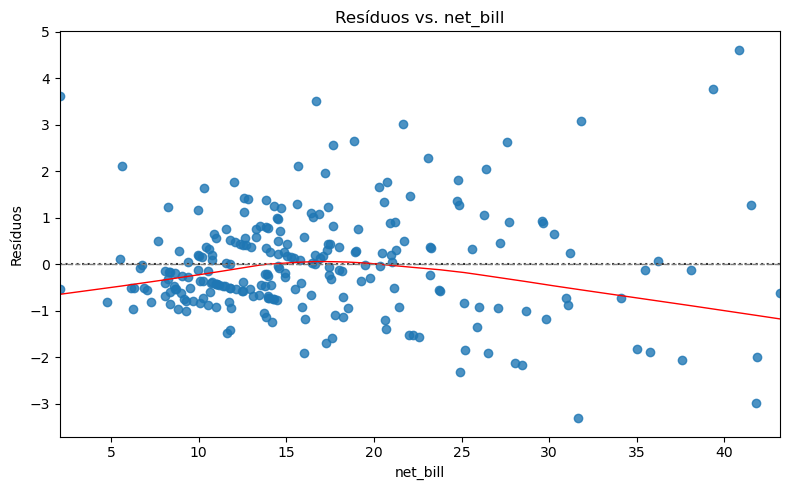

In [12]:
model_final = smf.ols('tip ~ net_bill', data=tips).fit()

residuals = model_final.resid

plt.figure(figsize=(8, 5))
sns.residplot(x='net_bill', y='tip', data=tips, lowess=True,
              line_kws={'color': 'red', 'lw': 1})
plt.title('Resíduos vs. net_bill')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

In [16]:
tips['log_net_bill'] = np.log(tips['net_bill'])
tips['net_bill_sq'] = tips['net_bill']**2

model_linear = smf.ols('tip ~ net_bill', data=tips).fit()
model_log = smf.ols('tip ~ log_net_bill', data=tips).fit()
model_poly = smf.ols('tip ~ net_bill + net_bill_sq', data=tips).fit()

results = pd.DataFrame({
    'Modelo': ['Linear', 'Logarítmico', 'Polinomial (grau 2)'],
    'R² Ajustado': [model_linear.rsquared_adj, model_log.rsquared_adj, model_poly.rsquared_adj]
})

print(results.sort_values)

<bound method DataFrame.sort_values of                 Modelo  R² Ajustado
0               Linear     0.329783
1          Logarítmico     0.291526
2  Polinomial (grau 2)     0.328898>


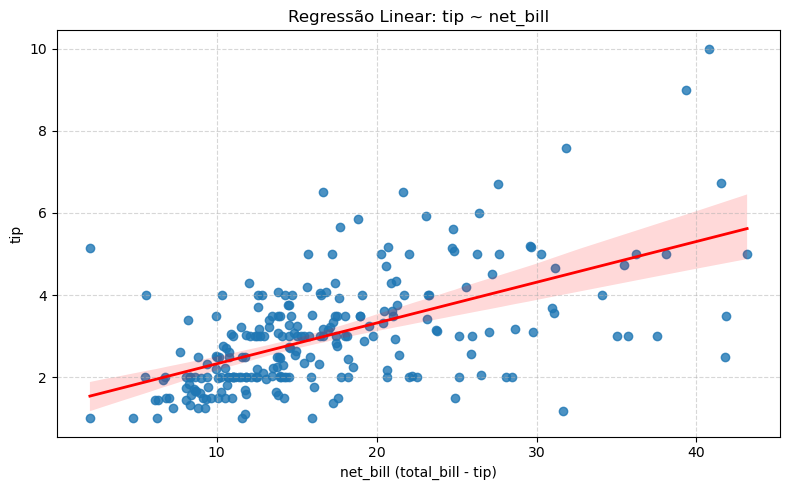

In [14]:
plt.figure(figsize=(8, 5))
sns.regplot(x='net_bill', y='tip', data=tips, ci=95, line_kws={"color": "red", "lw": 2})
plt.title('Regressão Linear: tip ~ net_bill')
plt.xlabel('net_bill (total_bill - tip)')
plt.ylabel('tip')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [17]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [19]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [21]:
y

DesignMatrix with shape (5, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  Terms:
    'tip' (column 0)

In [20]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

model = smf.ols('tip ~ sex + smoker + time + net_bill', data=tips).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           2.64e-20
Time:                        12:11:19   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

In [22]:
model_final = smf.ols('tip ~ net_bill', data=tips).fit()
print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           5.02e-23
Time:                        12:11:48   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

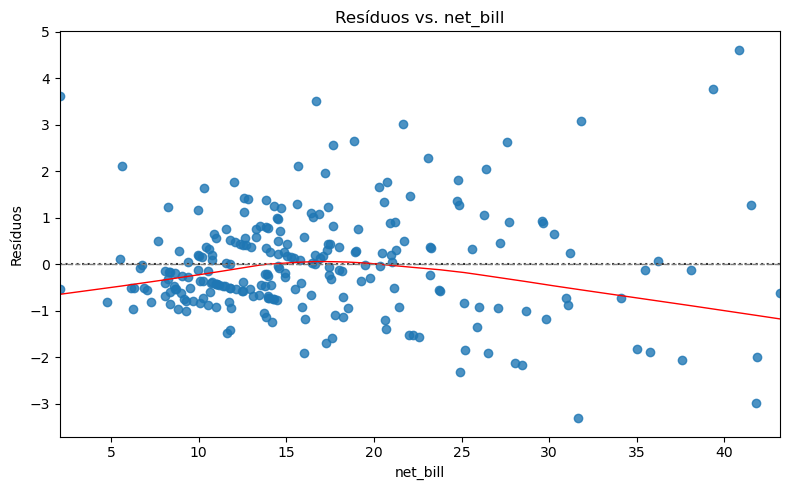

In [25]:
model_final = smf.ols('tip ~ net_bill', data=tips).fit()

residuals = model_final.resid

plt.figure(figsize=(8, 5))
sns.residplot(x='net_bill', y='tip', data=tips, lowess=True,
              line_kws={'color': 'red', 'lw': 1})
plt.title('Resíduos vs. net_bill')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

In [29]:
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['log_net_bill'] = np.log(tips['net_bill'])
tips['net_bill_sq'] = tips['net_bill'] ** 2

model_log = smf.ols('tip ~ log_net_bill', data=tips).fit()
model_poly = smf.ols('tip ~ net_bill + net_bill_sq', data=tips).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           4.40e-20
Time:                        12:16:41   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.2575      0.430     -2.924   

In [30]:
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           4.96e-22
Time:                        12:16:59   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0743      0.353      3.039      

In [31]:
model_log = smf.ols('tip ~ log_net_bill', data=tips).fit()

tips['log_pred'] = model_log.predict(tips)

tips['log_pred_original'] = np.exp(tips['log_pred'])

model_linear = smf.ols('tip ~ net_bill', data=tips).fit()

r2_log = model_log.rsquared
r2_linear = model_linear.rsquared

print(f"R² do Modelo Logarítmico: {r2_log:.4f}")
print(f"R² do Modelo Linear: {r2_linear:.4f}")


R² do Modelo Logarítmico: 0.2944
R² do Modelo Linear: 0.3325


Observando o R2 podemos notar um valor um pouco melhor no modelo Logaritimico a partir do net_bill, é uma pequena diferença mas ao buscarmos previsibilidade é algo a ser considerado.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [35]:
previsao_renda = pd.read_csv(r'C:\Users\marci\Desktop\Márcio\Programação\EBAC\02 - Phyton\4 - Desenvolvimento de aplicações com Python\Mod 12\previsao_de_renda.csv')
previsao_renda.head(5)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [36]:
previsao_renda.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [47]:
y, X = patsy.dmatrices('renda ~ tempo_emprego + 1', previsao_renda[:5])
X

DesignMatrix with shape (5, 2)
  Intercept  tempo_emprego
          1        6.60274
          1        7.18356
          1        0.83836
          1        4.84658
          1        4.29315
  Terms:
    'Intercept' (column 0)
    'tempo_emprego' (column 1)

In [44]:
y

DesignMatrix with shape (5, 1)
    renda
  8060.34
  1852.15
  2253.89
  6600.77
  6475.97
  Terms:
    'renda' (column 0)

In [45]:
previsao_renda['tempo_emprego'] = previsao_renda['tempo_emprego'].fillna(previsao_renda['tempo_emprego'].mean())

model = smf.ols('renda ~ tempo_emprego', data=previsao_renda).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     2483.
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:59:56   Log-Likelihood:            -1.5543e+05
No. Observations:               15000   AIC:                         3.109e+05
Df Residuals:                   14998   BIC:                         3.109e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1758.6514    100.786     17.449

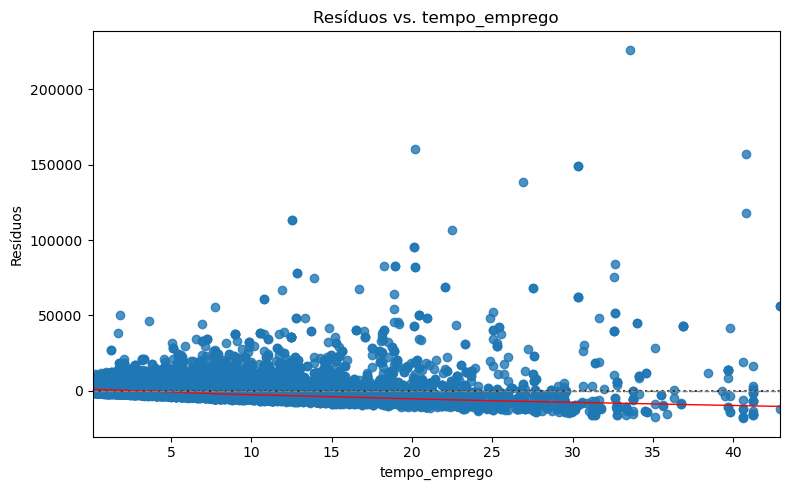

In [48]:
modelo_renda = smf.ols('renda ~ tempo_emprego', data=previsao_renda).fit()

residuo = modelo_renda.resid

plt.figure(figsize=(8, 5))
sns.residplot(x='tempo_emprego', y='renda', data=previsao_renda, lowess=True,
              line_kws={'color': 'red', 'lw': 1})
plt.title('Resíduos vs. tempo_emprego')
plt.xlabel('tempo_emprego')
plt.ylabel('Resíduos')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

In [49]:
previsao_renda['log_renda'] = np.log(previsao_renda['renda'])

previsao_renda['tempo_emprego'] = previsao_renda['tempo_emprego'].fillna(previsao_renda['tempo_emprego'].mean())

formula = 'log_renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia'

modelo = smf.ols(formula=formula, data=previsao_renda).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     333.6
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:04:32   Log-Likelihood:                -16212.
No. Observations:               15000   AIC:                         3.247e+04
Df Residuals:                   14975   BIC:                         3.266e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [50]:
formula_limpa = (
    'log_renda ~ sexo + posse_de_veiculo + posse_de_imovel + '
    'tipo_renda + estado_civil + qtd_filhos + idade + tempo_emprego + '
    'qt_pessoas_residencia'
)

formula_limpa = smf.ols(formula=formula_limpa, data=previsao_renda).fit()
print(formula_limpa.summary())


                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     523.9
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:05:52   Log-Likelihood:                -16262.
No. Observations:               15000   AIC:                         3.256e+04
Df Residuals:                   14984   BIC:                         3.268e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

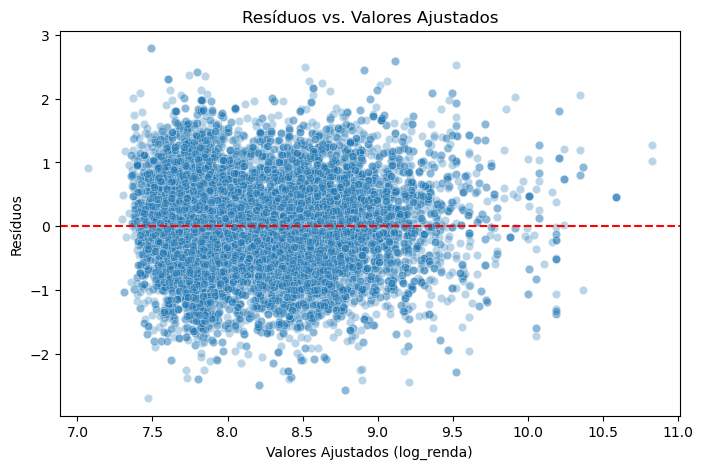

In [53]:
residuos = formula_limpa.resid
valores_ajustados = formula_limpa.fittedvalues

plt.figure(figsize=(8, 5))
sns.scatterplot(x=valores_ajustados, y=residuos, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados (log_renda)')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Ajustados')
plt.show()


Os dados estão relativamente próximos da linha vermelha o que indica certa coerência nos dados. Mas ainda assim é dificil indicar uma previsão adequada para os dados tratados desta forma. Sendo levado em consideração somente o tempo de emprego em relação a renda o dado é mais confiavel.